#### SETUP

In [1]:
import os 
os.getcwd()

'/Users/Cisco/Desktop/Master_Dauphine/M2_IEF/cours/semestre2/risque_multifreq/projet/src/exploratory_notebooks'

In [2]:
os.chdir('../')
os.getcwd()

'/Users/Cisco/Desktop/Master_Dauphine/M2_IEF/cours/semestre2/risque_multifreq/projet/src'

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from production_code import constants

#### DATA

In [4]:
signal = pd.read_excel('data/eurusd.xlsx')

In [5]:
signal.head()

,Date,PX_LAST
0,2020-04-03,1.0801
1,2020-04-02,1.0858
2,2020-04-01,1.0964
3,2020-03-31,1.1031
4,2020-03-30,1.1048


In [6]:
signal = signal.loc[signal["Date"] <= constants.NON_POW_END_DATE]
signal = signal.loc[signal["Date"] >= constants.NON_POW_START_DATE]

In [7]:
signal = signal["PX_LAST"].to_numpy()

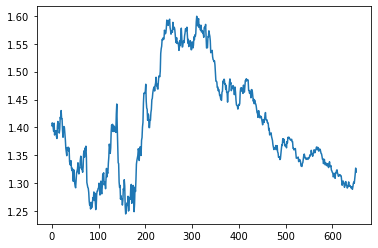

In [8]:
plt.plot(signal)

### DEFINE HAAR

In [9]:
def fatherHaar(t: float) -> float:
    return ((0 <= t) & (t < 1)) * 1
vfatherHaar = np.vectorize(fatherHaar)

In [10]:
def motherHaar(t: float) -> float:
    return fatherHaar(2 * t) - fatherHaar(2 * t - 1)
vmotherHaar = np.vectorize(motherHaar)

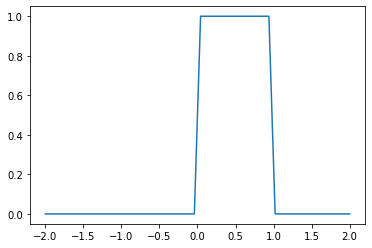

In [11]:
plt.plot(np.linspace(-2,2),vfatherHaar(np.linspace(-2,2)))

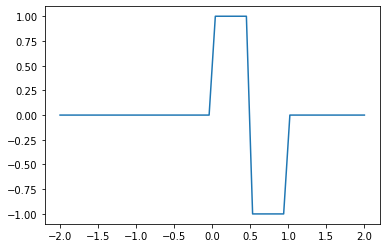

In [12]:
plt.plot(np.linspace(-2,2),vmotherHaar(np.linspace(-2,2)))

In [13]:
def waveletHaar(t: float, k: float, j: float) -> float:
    return pow(2, j / 2) * motherHaar(pow(2, j) * t - k)
vwaveletHaar = np.vectorize(waveletHaar)

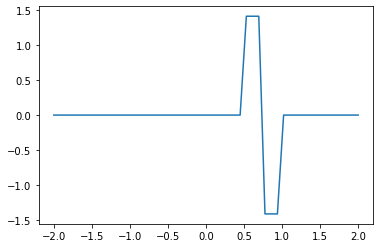

In [14]:
plt.plot(np.linspace(-2,2), vwaveletHaar(np.linspace(-2.0,2.0), 1, 1.0))

### exact article implementation

In [16]:
# Ensure signal is length power of two, otherwise take the most recent power of two
cnt = len(signal)
while (cnt % 2 != 0):
    cnt -= 1
start_index = len(signal) - cnt
signal = signal[start_index:]
print(len(signal))

652


In [15]:
# INPUTS defined page 15
a0 = 2
delta_j = 1
T = len(signal)
# compute scale grid as in article as well as max J
from production_code.wtHelpers import compute_scaling_parameter_grid
all_scale_params = compute_scaling_parameter_grid(delta_j, a0, T)

In [17]:
all_scale_params

[2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]

p.56

In [18]:
# Scale function page 9
def scaling_function_haar(t: float) -> float:
    return ((0 <= t) & (t < 1)) * 1.0
def rescaled_function_haar(t: float, a: float, b: float) -> float:
    return (1 / np.sqrt(a)) * scaling_function_haar((t - b) / a)

In [19]:
# Vectorizations
vscaling_function_haar = np.vectorize(scaling_function_haar)
vrescaled_function_haar = np.vectorize(rescaled_function_haar)

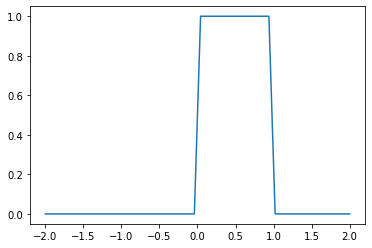

In [29]:
plt.plot(np.linspace(-2,2), vrescaled_function_haar(np.linspace(-2,2), 1, 0))